In [8]:
# %pip install pandas
# %pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from sklearn.utils import shuffle
import random
import math
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Generate Random Campaings
# df = pd.read_excel(r'/Users/mithat/Library/CloudStorage/OneDrive-Personal/Documenten/Computer Science/Year 3/Scriptie/GoogleAds.xlsx')
# df = shuffle(df)
# df = df.dropna()
# df = df.reset_index(drop=True)
# df.to_excel(r'/Users/mithat/Library/CloudStorage/OneDrive-Personal/Documenten/Computer Science/Year 3/Scriptie/RandomCampaigns.xlsx', index=False)

# Random Campaigns
df = pd.read_excel(r'/Users/mithat/Library/CloudStorage/OneDrive-Personal/Documenten/Computer Science/Year 3/Scriptie/RandomCampaigns.xlsx')
# clicks = random.randrange(0, 40)
# impressions = random.randrange(100, 2000)
# cost = random.uniform(0, 60)
# ctr = clicks/impressions * 100
# score = ((impressions/500)**2*(1/3)+(clicks/10)**2*(1/3)+(ctr/2.2)**2*(1/3))*100

# for i in df.index:
#     clicks = random.randrange(0, 40)
#     impressions = random.randrange(100, 2000)
#     cost = random.uniform(0, 60)
#     ctr = clicks/impressions * 100
#     score = ((impressions/500)**2*(1/3)+(clicks/10)**2*(1/3)+(ctr/2.2)**2*(1/3))*100

#     df.at[i,'clicks'] = clicks
#     df.at[i,'impressions'] = impressions
#     df.at[i,'cost'] = cost
#     df.at[i,'ctr'] = ctr
#     df.at[i,'score'] = score
    

display(df)
# print(clicks)
# print(impressions)
# print(cost)
# print(score)
# print(ctr)

,Keywords,Description,Headline,Location,Sitelink,Callout,Url,clicks,impressions,cost,ctr,score
0,project software,Project + Artwork Management Tool | 100% cloud...,Efficient Teamwork Starts Here,"USA, Canada",See Our Features\n\nD: Integrations - Automati...,Start in Minutes,https://twonas.com/services/ams/?source=genesis,11,1959,11.995903,0.561511,554.195584
1,pm software,Free plans available. Integrate with your othe...,#1 Artwork Management Tool,"Australia, New Zealand","Free Plans Available\n\nD: Three Plans, All Co...",No Download Necessary,https://twonas.com/services/ams/why/?source=ge...,20,934,54.927843,2.141328,281.226558
2,packaging design software,"Plan, Track, and Collaborate Using the Softwar...",Change The Way You Manage Art,"Norway, Sweden, Finland, Denmark, Iceland",Free Project Manager\n\nD: From Basic Projects...,For Teams of 3 and Up,https://twonas.com/services/ams/pricing/?sourc...,2,1137,27.757507,0.175901,173.915628
3,workflow management software,Set for Success with Easy Integrations. Perfec...,Shape Your Workflow in Minutes,"Spain, France, Italy, Portugal",Free Workflow Manager\n\nD: Plans Built for Te...,Easy to Use,https://twonas.com/services/ams/contact/?sourc...,26,1594,12.594008,1.631117,582.434756
4,project plan tool,The Newest Tech in Artwork Management. Simple ...,Artwork Management Made Easy,"United Kingdom, Ireland",See Pricing\n\nD:See All of Our Plans and See ...,Free Plans Available,https://twonas.com/services/ams/features/?sour...,24,1400,1.584535,1.714286,473.572834


Randomly selected value from column 'Keywords': project software
Randomly selected value from column 'Description': The Newest Tech in Artwork Management. Simple & Powerful. 100% Cloud-Based Tool.
Randomly selected value from column 'Callout': No Download Necessary
Generation 1 - Best Fitness: 3184.201134182798
Generation 2 - Best Fitness: 3184.201134182798
Generation 3 - Best Fitness: 3184.201134182798
Generation 4 - Best Fitness: 3184.201134182798


/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

Generation 5 - Best Fitness: 3184.201134182798
Generation 6 - Best Fitness: 3184.201134182798
Generation 7 - Best Fitness: 3684.201134182798
Generation 8 - Best Fitness: 3684.201134182798


/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

Generation 9 - Best Fitness: 3684.201134182798
Generation 10 - Best Fitness: 3684.201134182798
Generation 11 - Best Fitness: 3684.201134182798
Generation 12 - Best Fitness: 4184.201134182798


/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

Generation 13 - Best Fitness: 4184.201134182798
Generation 14 - Best Fitness: 4184.201134182798
Generation 15 - Best Fitness: 4184.201134182798


/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


Generation 16 - Best Fitness: 4184.201134182798
Generation 17 - Best Fitness: 4684.201134182798
Generation 18 - Best Fitness: 4684.201134182798


/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

Generation 19 - Best Fitness: 4684.201134182798
Generation 20 - Best Fitness: 4684.201134182798
Generation 21 - Best Fitness: 4684.201134182798
Generation 22 - Best Fitness: 4684.201134182798


/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

Generation 23 - Best Fitness: 4684.201134182798
Generation 24 - Best Fitness: 4684.201134182798
Generation 25 - Best Fitness: 4684.201134182798
Generation 26 - Best Fitness: 4684.201134182798


/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

Generation 27 - Best Fitness: 4684.201134182798
Generation 28 - Best Fitness: 4684.201134182798
Generation 29 - Best Fitness: 4684.201134182798
Generation 30 - Best Fitness: 4684.201134182798


/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

Generation 31 - Best Fitness: 4684.201134182798
Generation 32 - Best Fitness: 4684.201134182798
Generation 33 - Best Fitness: 4684.201134182798
Generation 34 - Best Fitness: 4684.201134182798


/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

Generation 35 - Best Fitness: 4684.201134182798
Generation 36 - Best Fitness: 4684.201134182798
Generation 37 - Best Fitness: 4684.201134182798
Generation 38 - Best Fitness: 4684.201134182798
Generation 39 - Best Fitness: 4684.201134182798


/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

Generation 40 - Best Fitness: 4684.201134182798
Generation 41 - Best Fitness: 4684.201134182798
Generation 42 - Best Fitness: 4684.201134182798
Generation 43 - Best Fitness: 4684.201134182798
Generation 44 - Best Fitness: 4684.201134182798


/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

Generation 45 - Best Fitness: 4684.201134182798
Generation 46 - Best Fitness: 4684.201134182798
Generation 47 - Best Fitness: 4684.201134182798
Generation 48 - Best Fitness: 4684.201134182798


/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

Generation 49 - Best Fitness: 4684.201134182798
Generation 50 - Best Fitness: 4684.201134182798
Best Individual:
{'Keywords': ['project software', 'artwork management solutions'], 'Description': 'The Newest Tech in Artwork Management. Simple & Powerful. 100% Cloud-Based Tool.', 'Headline': 'QA + Design Workflow', 'Location': 'Norway, Sweden, Finland', 'Sitelink': 'Free Workflow Manager\n\nD: Plans Built for Teams of All Sizes. Try for Free.', 'Callout': 'No Download Necessary', 'Url': 'https://twonas.com/services/ams/?source=genesis', 'Click': 39, 'Impression': 198}


/var/folders/wc/7yzv3_vd6xjbkbtdqwwcbs480000gn/T/ipykernel_4960/1157597554.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


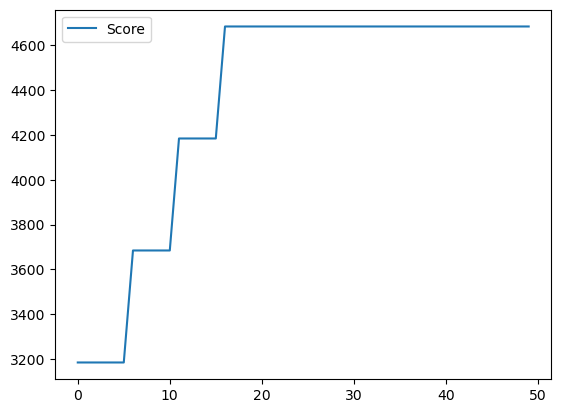

In [41]:
#Genetic Algorithm

# Define the parameters to optimize
genericDf = pd.read_excel(r'/Users/mithat/Library/CloudStorage/OneDrive-Personal/Documenten/Computer Science/Year 3/Scriptie/GoogleAds.xlsx')
# convert DataFrame to sorted dictionary
parameters = dict(sorted(genericDf.to_dict(orient='list').items()))
# remove NaN values from dictionary
parameters = {k: [v for v in lst if pd.notnull(v)] for k, lst in parameters.items()}

# Example parameter values
Keywords = parameters['Keywords']
Descriptions = parameters['Description']
Headlines = parameters['Headline']
Locations = parameters['Location']
Sitelinks = parameters['Sitelink']
Callouts = parameters['Callout']
Urls = parameters['Url']

# Constants
POPULATION_SIZE = 20
GENERATIONS = 50
MUTATION_RATE = 0.1

# randomly select one or more columns
df_sub = df.iloc[:, :7]
columns_to_select = random.sample(list(df_sub.columns), random.randint(1, 7))

# randomly select an element from each selected column
values_to_check = []
for col in columns_to_select:
    row_index = random.randint(0, len(df_sub) - 1)
    value = df_sub.loc[row_index, col]
    values_to_check.append(value)
    print(f"Randomly selected value from column '{col}': {value}")

# Function to generate an individual with random parameters
def generate_individual():
    clicks = random.randrange(0, 40)
    impressions = random.randrange(100, 2000)
    
    individual = {
        "Keywords": random.sample(Keywords, k=random.randint(1, 5)),
        "Description": random.choice(Descriptions),
        "Headline": random.choice(Headlines),
        "Location": random.choice(Locations),
        "Sitelink": random.choice(Sitelinks),
        "Callout": random.choice(Callouts),
        "Url": random.choice(Urls),
        "Click": clicks,
        "Impression": impressions,
    }
    return individual

# Function to generate an initial population
def generate_population():
    population = []
    for _ in range(POPULATION_SIZE):
        individual = generate_individual()
        population.append(individual)
    return population

# Function to evaluate the fitness of an individual (example fitness function)
def evaluate_fitness(campaign):
    ctr = campaign['Click']/campaign['Impression'] * 100
    score = ((campaign['Impression']/500)**2*(1/3)+(campaign['Click']/10)**2*(1/3)+(ctr/2.2)**2*(1/3))*100

    # if campaign['Callout'] == 'Easy to Use':
    #         score += 1000

    # add bonus for the keyword 'packaging design software'
    for col, value in zip(columns_to_select, values_to_check):
        if value in pd.Series(campaign[col]).values:
            score += 500

    # Return a fitness score
    return score

# Function to perform mutation on an individual
def mutate(individual):
    for param in individual:
        if random.random() < MUTATION_RATE:
            if param == "Keywords":
                individual[param] = random.sample(Keywords, k=random.randint(1, 5))
            elif param == "Impression" or param == "Click":
                continue
            else:
                individual[param] = random.choice(eval(param + "s"))
    return individual

# Function to perform crossover between two parents
def crossover(parent1, parent2):
    child = {}
    for param in parent1:
        if random.random() < 0.5:
            child[param] = parent1[param]
        else:
            child[param] = parent2[param]
    return child

# Function to select individuals for the next generation using tournament selection
def selection(population):
    tournament_size = int(0.2 * POPULATION_SIZE)
    selected = []
    for _ in range(POPULATION_SIZE):
        tournament = random.sample(population, k=tournament_size)
        best_individual = max(tournament, key=lambda x: evaluate_fitness(x))
        selected.append(best_individual)
    return selected

# Main algorithm loop
def plant_propagation_algorithm():
    results = pd.DataFrame()
    population = generate_population()
    
    for generation in range(GENERATIONS):
        print(f"Generation {generation + 1} - Best Fitness: {evaluate_fitness(max(population, key=lambda x: evaluate_fitness(x)))}")
        new_row = pd.Series([evaluate_fitness(max(population, key=lambda x: evaluate_fitness(x)))], index=['Score'])
        # append the new row to the DataFrame
        results = results.append(new_row, ignore_index=True)

        new_population = []
        
        for _ in range(POPULATION_SIZE // 2):
            parents = random.sample(population, k=2)
            child1 = crossover(parents[0], parents[1])
            child2 = crossover(parents[1], parents[0])
            child1 = mutate(child1)
            child2 = mutate(child2)
            new_population.extend([child1, child2])

        population = selection(population) + new_population

    best_individual = max(population, key=lambda x: evaluate_fitness(x))
    print("Best Individual:")
    print(best_individual)

    results.plot()

# Run the plant propagation algorithm
plant_propagation_algorithm()